## Discrete Bak Sneppen model

In the discrete Bak-Sneppen model [2], each node on a circle of $n$ nodes is given a fitness of either $0$ or $1$. Then a node with fitness zero is chosen uniformly at random. This node together with its two neighbors are replaced by three nodes,  each of which has a fitness $1$ with probability $p$ and $0$ with probability $1-p$. 

If no one has fitness $0$, then the process *restarts* by choosing a uniform random node.

You can think of this model as if someone at work has Covid-19 😷️.
So they and their colleagues sitting next to them have to go home and be replaced by people who (unfortunately) may or may not have Covid-19.

## An example

For example, suppose initially the cycle looks like this.

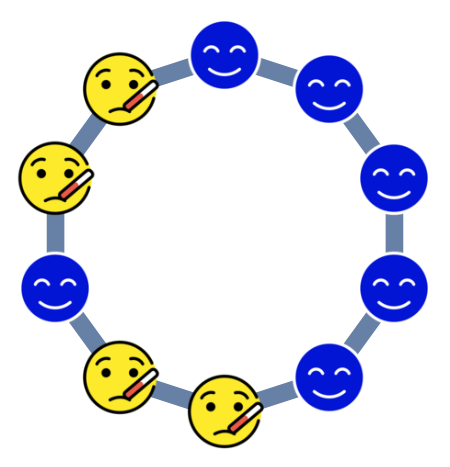

Then the node at the top together with its two neighbors are selected.

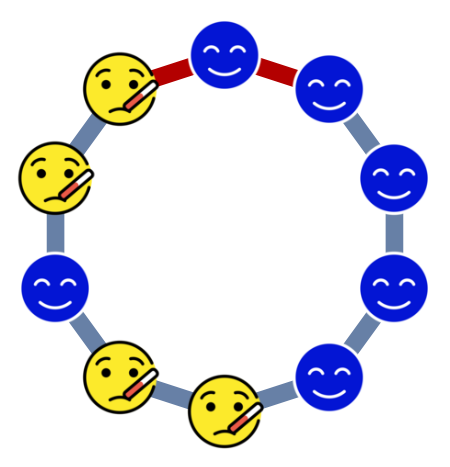

Three new nodes come to replace them, each with a random fitness. And the graph looks like this now.

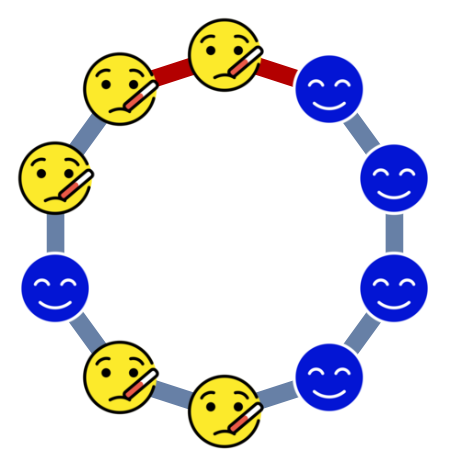

## A phase transition

We can view the status of the $n$ nodes on the circle as a Markov chain. This converges to a stationary distribution $\pi^{(n)}$ on $\{0,1\}^n$. Let $\nu^{(n)}(p)$ be the probability that the first node (actually any fixed node) on the circle has fitness $1$ in the stationary distribution.

It has been observed for a long time that if $p > 0.36$, then $\nu^{(n)} \to 1$.
In other words, 
a fixed node eventually will have fitness $1$ almost all the time. 
Otherwise it will have fitness $0$ for some portion of time.

A [recent paper](https://arxiv.org/abs/2003.00222) by Stanislav Volkov [1] which proved the first part for $p > 0.411$. 

For the second part an [old paper](https://www.semanticscholar.org/paper/Non-Triviality-of-a-Discrete-Bak%E2%80%93Sneppen-Evolution-Meester-Znamenski/050d3597f5412ad6c1e9043b2200aab4731fff27) [3] shows that it is true for $p<p_c$ where $p_c$ is non-zero constant. But no explicit bound on $p_c$ is given. So the problem now is if this gap can actually be closed? Or at least can we show that there is indeed a threshold?

## Bak-Sneppen on positive integers with two replacement

It seems a bit difficult to actually prove the threshold exists for the original model. So I come up with a simpler model that may be a slightly easier to analyze. 

It works as follows

1. Put a label 1 😀️ on all positive integers $\ge 2$. Put label 0 😷️ on integer $1$.
2. Choose an integer $u$ with label 0 uniformly at random among all such integers. 
3. Change the label of this integer to 1 with probability $p$, and keep it as $0$ with probability $1-p$. 
4. Do the same for the for the integer $u+1$ (the neighbor on the right).
5. We say the process dies if there is no 0 integers left.

In other words, instead of replacing three people, we replace two. And the process runs on a line of infinite length instead of a cycle.

Here's my conjecture based on simulations.

1. If $p > 0.24$, then the process dies with probability $1$
2. If $p \in (0, 0.23)$, then the process has positive probability to run forever.

## Phase transition

In the simulation, if the process dies we just restart it.

We call the distance between the largest and the smallest integer with a label 0  the __diameter__ of the process.

In [1]:
ENV["GKS_ENCODING"]="utf8"
using Plots; using Pkg; Pkg.activate("..");
using Revise, BakSneppenSimulation

 Activating environment at `~/Dropbox/Research/2020/Bak-Sneppen/BakSneppenSimulation/Project.toml`


### The threshold

For $p<0.23$, the picture looks like this. As you can see, the diameter and number of zeros all goes up forever.

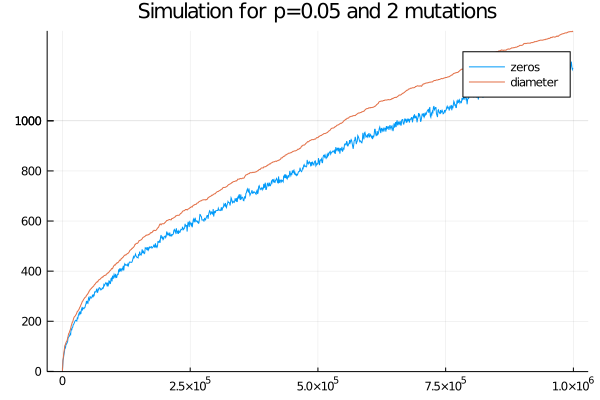

In [2]:
plotsim(simlinear(SimConfig(1000, 0.05, 2, 10^6)))

At $0.23$ the growth is not that smooth anymore.

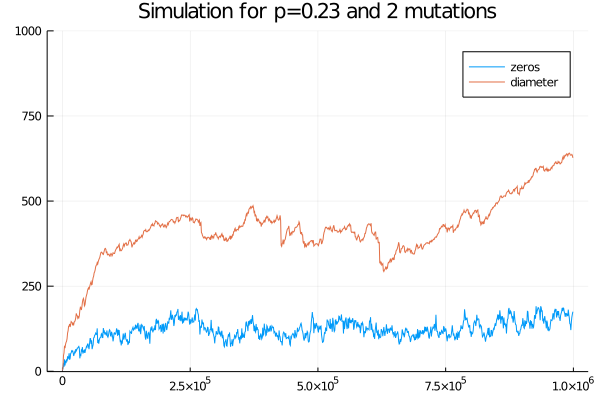

In [3]:
plotsim(simlinear(SimConfig(1000, 0.23, 2, 10^6)))

For $p=0.24$, it is clear that the process dies every time it starts

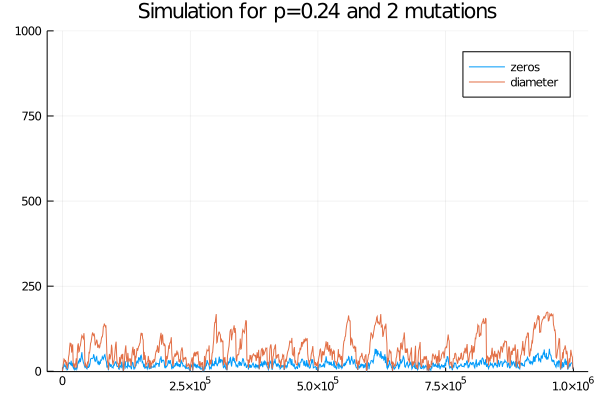

In [4]:
plotsim(simlinear(SimConfig(1000, 0.24, 2, 10^6)))

### The percentage of zeros

Another interesting thing to notice is that the number of of zero divided by the diameter seems to be stable when $p$ is small. 

My guess is that this ratio should be $1-2 p$. 
This is because if we assume that the positions of $0$ and $1$ are uniformly at random between the first and the last $0$'s (which they are not), then with $1-2 p$ percentage of $0$, the percentage of $0$ will remain stable in expectation.

Simulations seem to agree.

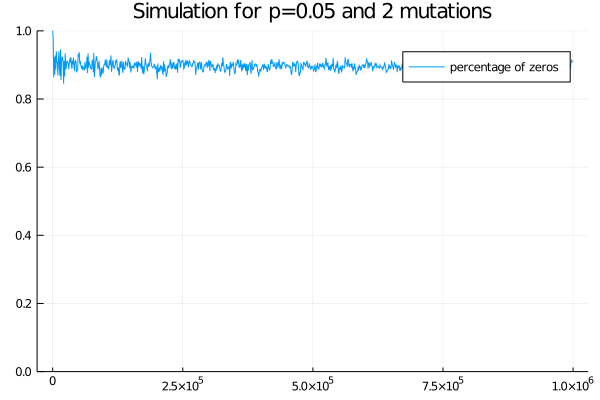

In [5]:
plotzero(simlinear(SimConfig(1000, 0.05, 2, 10^6)))

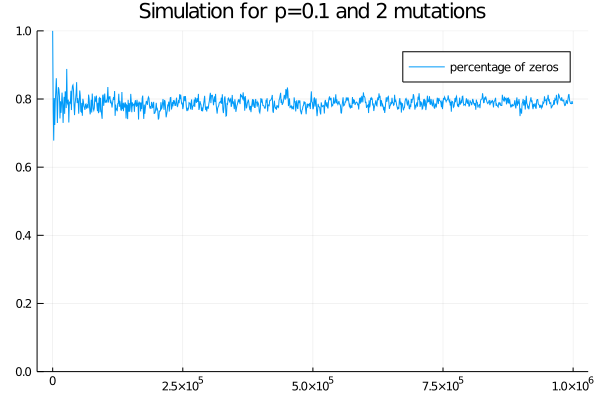

In [6]:
plotzero(simlinear(SimConfig(1000, 0.1, 2, 10^6)))

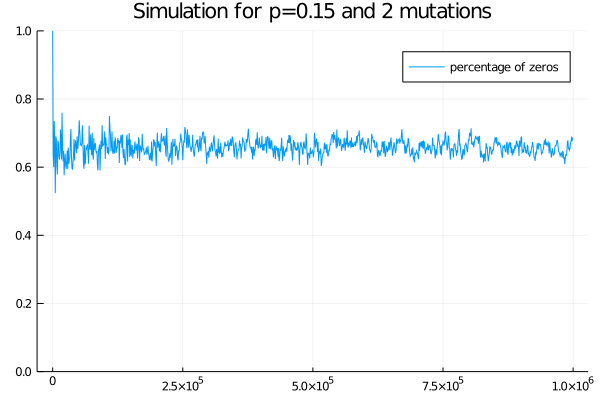

In [7]:
plotzero(simlinear(SimConfig(1000, 0.15, 2, 10^6)))

## A generalization

More generally, we can play with parameters $l$ and $r$, which are the number of neighbors on the left/right which are replaced together with the chosen 0.
So the model above corresponds to $l=0$ and $r=1$.

Simulation seems to suggest that as long as $r \ge 1$, there is always a threshold.

### $l=1$ and $r=1$

If we let $l=1$ and $r=1$, then not surprisingly we get the same threshold as $0.36$ as in the original circular model.

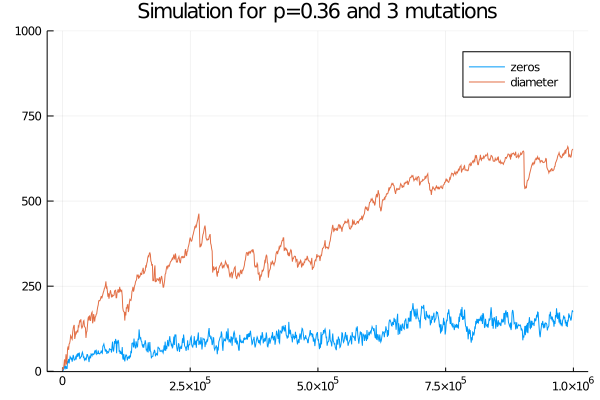

In [8]:
plotsim(simlinear(SimConfig(1000, 0.36, 3, 10^6)))

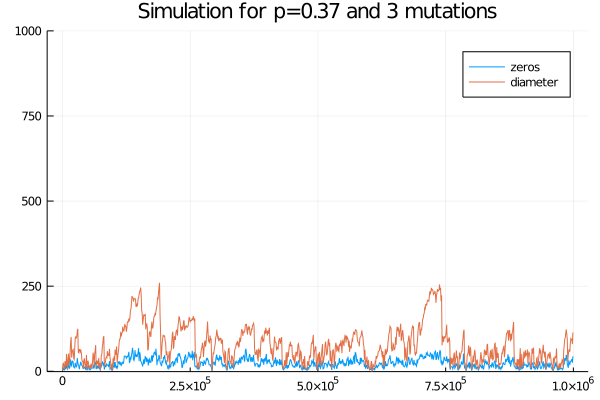

In [9]:
plotsim(simlinear(SimConfig(1000, 0.37, 3, 10^6)))

### $l=1$ and $r=2$

In this case, there seems to exist a threshold around $0.48$. That means the larger the $l$, the more likely for it to survive.

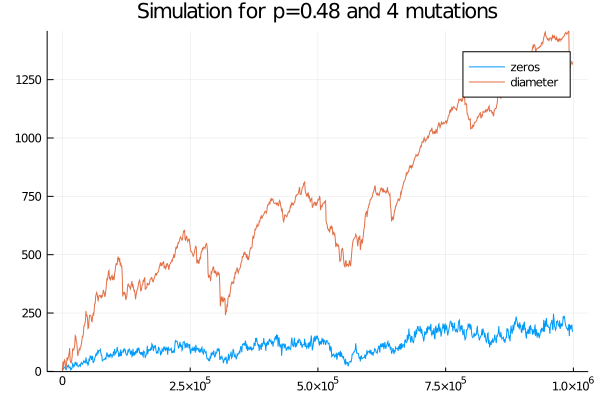

In [10]:
plotsim(simlinear(SimConfig(1000, 0.48, 4, 10^6)))

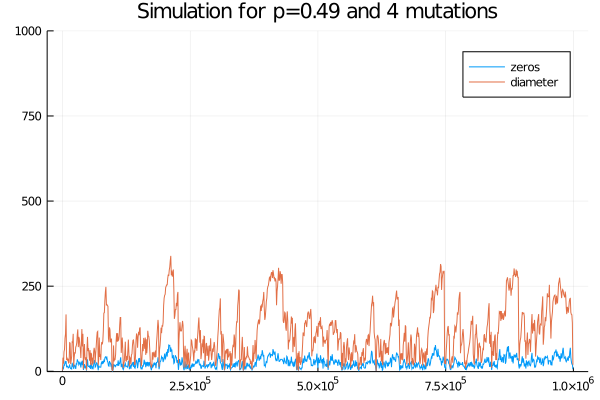

In [11]:
plotsim(simlinear(SimConfig(1000, 0.49, 4, 10^6)))

### Reference

[1] S. Volkov, “Rigorous upper bound for the discrete Bak-Sneppen model,” arXiv:2003.00222 [math], Feb. 2020 [Online]. Available: http://arxiv.org/abs/2003.00222. [Accessed: 23-Apr-2020]

[2] J. Barbay and C. Kenyon, “On the discrete Bak-Sneppen model of self-organized criticality,” in Proceedings of the twelfth annual ACM-SIAM symposium on Discrete algorithms, Washington, D.C., USA, 2001, pp. 928–933. 

[3]R. Meester and D. Znamenski, “Non-triviality of a discrete Bak-Sneppen evolution model,” arXiv:cond-mat/0301480, Jan. 2003 [Online]. Available: http://arxiv.org/abs/cond-mat/0301480. [Accessed: 24-Apr-2020]